# $$ \mathrm{Network-Analysis} $$

In [2]:
import sys
sys.path.append("/usr/lib/python2.7/dist-packages")

In [3]:
import numpy            as np
import graph_tool.all as gt
import matplotlib.pyplot as plt
from collections import defaultdict

In [15]:
g = gt.load_graph("HIT.xml.gz")
pw = g.edge_properties["weight"]
iw = g.edge_properties["inv_weight"]
print "number of nodes ", g.num_vertices()
print "number of edges ", g.num_edges()

number of nodes  97980
number of edges  315333


# $$ ------------------------------- \\ PageRank $$

In [28]:
g.set_vertex_filter( None )
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
pagerank, it = gt.pagerank(g, damping=0.85, weight=pw, epsilon=1e-06, ret_iter=True)
data = np.sort(pagerank.fa)
values  = np.unique(data)
pdf = [np.count_nonzero(data == w) for w in values]
cdf = np.cumsum(pdf).astype(float)
cdf *= 1./cdf[-1]
ccdf = 1.-cdf

Iterations:  49


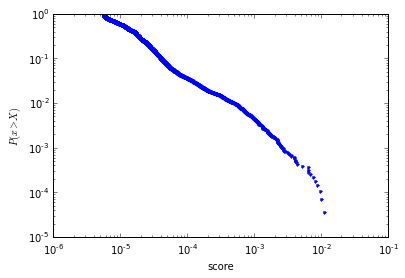

In [29]:
%matplotlib inline
plt.figure()
plt.loglog(values,ccdf,'b.')
plt.xlabel('score')
plt.ylabel(r'$P(x>X)$')
print "Iterations: ", it

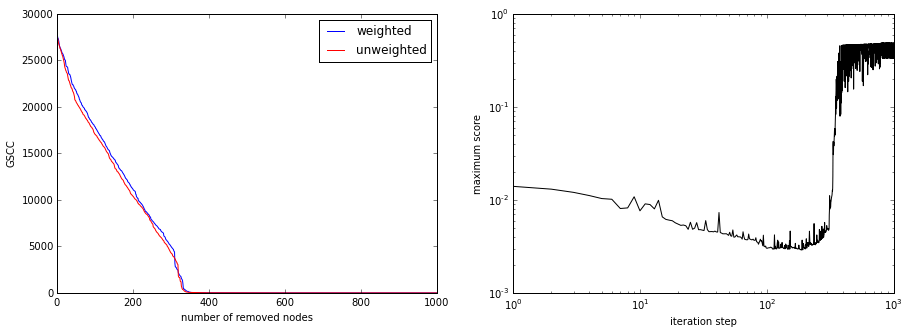

In [11]:
%matplotlib inline
result = np.load('pagerank_centrality_filtered.npz')
size = result['size']
max_score = result['max_score']
N = len(size)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(N),size,'b-')
ax1.set_ylabel('GSCC')
ax1.set_xlabel('number of removed nodes')

ax2 = plt.subplot(122)
ax2.loglog(range(N),max_score,'k-')
ax2.set_xlabel('iteration step')
ax2.set_ylabel('maximum score')

result = np.load('pagerank_centrality_unweighted.npz')
size = result['size']
N = len(size)
ax1.plot(range(N),size,'r-')
ax1.legend(["weighted", "unweighted"])

# $$ ------------------------------- \\ Eigenvector $$

In [16]:
g.set_vertex_filter( None )
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
eigenvalue, eigenvector = gt.eigenvector(g, epsilon=1e-8,max_iter=300)
data = np.sort(eigenvector.fa)
values  = np.unique(data)
pdf = [np.count_nonzero(data == w) for w in values]
cdf = np.cumsum(pdf).astype(float)
cdf *= 1./cdf[-1]
ccdf = 1.-cdf

Largest Eigenvalue:  0.0372614998101


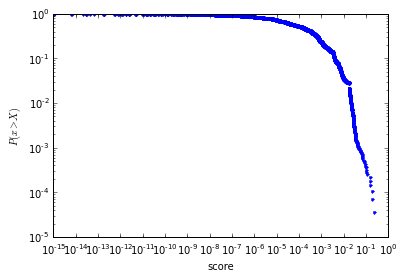

In [17]:
%matplotlib inline
plt.figure()
plt.loglog(values,ccdf,'b.')
plt.xlabel('score')
plt.ylabel(r'$P(x>X)$')
#plt.xlim(0.000000001,100)
print 'Largest Eigenvalue: ', eigenvalue

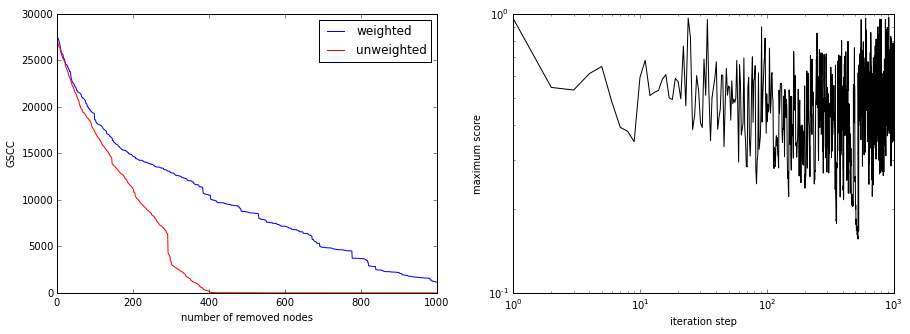

In [12]:
%matplotlib inline
result = np.load('eigenwert_centrality_filtered.npz')
N = result['N']
size = result['size'][0:N]
max_score = result['max_score'][0:N]


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(N),size,'b-')
ax1.set_ylabel('GSCC')
ax1.set_xlabel('number of removed nodes')

ax2 = plt.subplot(122)
ax2.loglog(range(N),max_score,'k-')
ax2.set_xlabel('iteration step')
ax2.set_ylabel('maximum score')

result = np.load('eigenwert_centrality_unweighted.npz')
N = result['N']
size = result['size'][0:N]
ax1.plot(range(N),size,'r-')
ax1.legend(["weighted", "unweighted"])

# $$ ------------------------------- \\ Katz $$

In [12]:
g.set_vertex_filter( None )
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
katz = gt.katz(g, alpha=0.01, beta=None, weight=pw, epsilon=1e-06, max_iter=None)
data = np.sort(katz.fa)
values  = np.unique(data)
pdf = [np.count_nonzero(data == w) for w in values]
cdf = np.cumsum(pdf).astype(float)
cdf *= 1./cdf[-1]
ccdf = 1.-cdf

[ 0.07304109  0.07918348  0.09734986  0.10179857  0.12061583  0.12570034
  0.33679331  0.34694798  0.51405564  0.61532317]


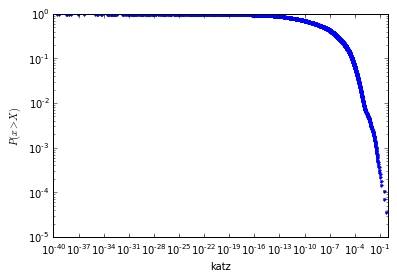

In [13]:
%matplotlib inline
plt.figure()
plt.loglog(values,ccdf,'b.')
plt.xlabel('katz')
plt.ylabel(r'$P(x>X)$')
print values[-10::]

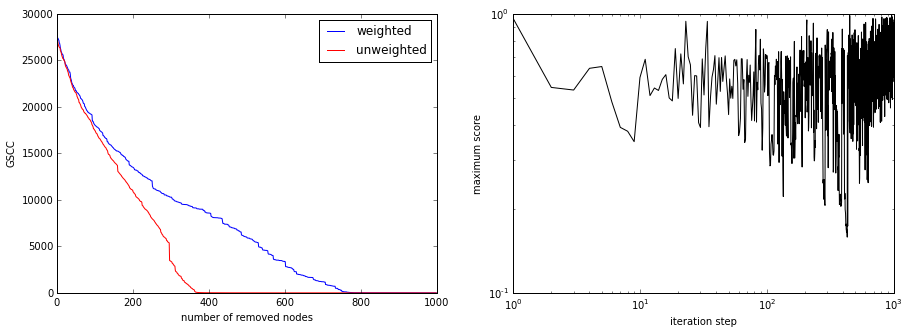

In [13]:
%matplotlib inline
result = np.load('katz_centrality.npz')
N = result['N']
size = result['size'][0:N]
max_score = result['max_score'][0:N]


fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(N),size,'b-')
ax1.set_ylabel('GSCC')
ax1.set_xlabel('number of removed nodes')

ax2 = plt.subplot(122)
ax2.loglog(range(N),max_score,'k-')
ax2.set_xlabel('iteration step')
ax2.set_ylabel('maximum score')

result = np.load('katz_centrality_unweighted.npz')
N = result['N']
size = result['size'][0:N]
ax1.plot(range(N),size,'r-')
ax1.legend(["weighted", "unweighted"])

# $$ ------------------------------- \\ HITS $$

In [15]:
g.set_vertex_filter( None )
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
prop = {}
eig, prop["Authority"], prop["Hub"] = gt.hits(g, weight=pw, epsilon=1e-06, max_iter=None)

Largest Eigenvalue of the co-citation matrix:  1.36276665059e-13


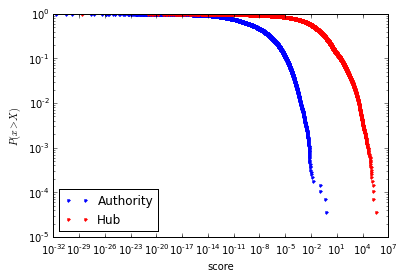

In [18]:
%matplotlib inline
color = {"Authority":'b.',"Hub":'r.'}
plt.figure()
for centrality in ["Authority","Hub"]:
    data = np.sort(prop[centrality].fa)
    values  = np.unique(data)
    pdf = [np.count_nonzero(data == w) for w in values]
    cdf = np.cumsum(pdf).astype(float)
    cdf *= 1./cdf[-1]
    ccdf = 1.-cdf
    plt.loglog(values,ccdf,color[centrality],label=centrality)
plt.xlabel('score')
plt.ylabel(r'$P(x>X)$')
plt.legend(loc="lower left")
print "Largest Eigenvalue of the co-citation matrix: ", eig

999
999


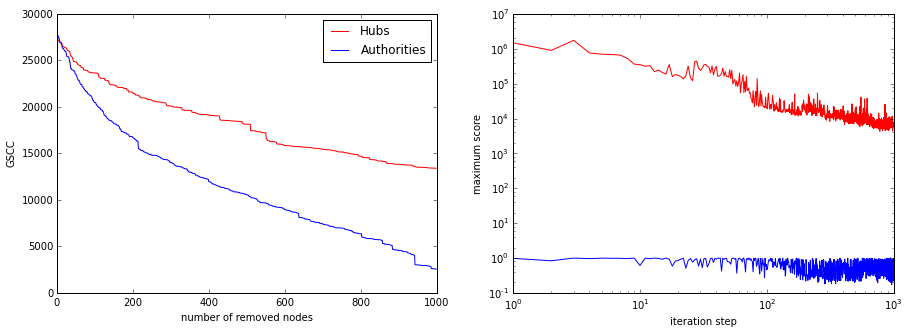

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = plt.subplot(122)
color = {'hits_authorities_filtered': 'b-', 'hits_hubs_filtered': 'r-'}

for cen in ['hits_hubs_filtered','hits_authorities_filtered']:
    result = np.load(cen +'.npz')
    N = result['N']
    size = result['size'][0:N]
    max_score = result['max_score'][0:N]
    
    ax1.plot(range(N),size,color[cen])
    ax1.set_ylabel('GSCC')
    ax1.set_xlabel('number of removed nodes')
    
    ax2.loglog(range(N),max_score,color[cen])
    ax2.set_xlabel('iteration step')
    ax2.set_ylabel('maximum score')
    print N
ax1.legend(['Hubs', 'Authorities'],loc='upper right')

# $$ -------------------------------\\ Submit~a~job $$

In [1]:
from subprocess import Popen, PIPE, check_call
from time import sleep
centrality = [("job_HITS_Hubs","hits_hubs"),
              ("job_HITS_Authorities","hits_authorities"),
              ("job_katz_centrality","katz_centrality"),
              ("job_eigenwert_centrality","eigenwert_centrality"),
              ("job_pagerank_centrality","pagerank_centrality")]

for (job,name) in centrality[3:4]:
    fname = "/home/andreasko/netzwerk_analyse/"
    process = Popen("qsub -o %s -m e -mem 4 -speed 3 -numcpus 8 -env PYTHONPATH=%s -args '%s' %s"
          %(fname+name, "$PYTHONPATH:.",fname, job), shell=True, stdout=PIPE, stderr=PIPE)
    print process.stdout.read()
    print process.stderr.read()
    sleep(1)

 ___________________________________________
/ ----------------------------------------- \
| | DIE Q INFORMIERT:                     | |
| | Condor under normal Operation   !     | |
| | Die Option speed option wurde geändert| |
\ ----------------------------------------- /
 -------------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||
This is qpy-condor wrapper for qsub.
send comments or bug-reports to root@itp.tu-berlin.de
Set memtype to 4
Set speed type to 3
Request 8 cores.
Add environmental variables 'PYTHONPATH=/usr/glocal/lib64/python2.7/site-packages:/usr/local/lib64/python2.7/site-packages:.' to executed job.
Pass Argument '/home/andreasko/netzwerk_analyse/' to submitted binary.
Workgroup agschoell detected!

Preparing submission file, please wait
Output file: /home/andreasko/netzwerk_analyse/eigenwert_centrality
Job prepared with QCONDOR=1;PATH=/home/andreasko/anaconda/bin